In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

In [22]:
# get total number of fatalities

df = pd.read_csv('../FARS2019NationalCSV/Person.CSV', encoding="ISO-8859-1")
df = df.loc[df['INJ_SEV'] == 4]
print(len(df))

36355


/var/folders/rv/4pnymp6j7bd30dklzsj4ykr40000gn/T/ipykernel_51508/2645303014.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../FARS2019NationalCSV/Person.CSV', encoding="ISO-8859-1")


In [113]:
# get fatalities of only when there are multiple people in vehicle
df1 = pd.read_csv('../FARS2019NationalCSV/vehicle.csv', encoding="ISO-8859-1")
df1 = df1.loc[df1['NUMOCCS'] > 1]
df2 = pd.read_csv('../FARS2019NationalCSV/Person.CSV', encoding="ISO-8859-1")
df2 = df2[df2['ST_CASE'].isin(df1['ST_CASE'].values.tolist())]
df = df2.loc[df2['INJ_SEV'] == 4]
print()
print(df['ST_CASE'][0:20])
print(df['INJ_SEV'][0:20])
print(len(df))
print("person #\n",df['PER_NO'][0:20])
print(df['DOA'][0:20]) # dead on arrival

/var/folders/rv/4pnymp6j7bd30dklzsj4ykr40000gn/T/ipykernel_51723/2434874385.py:2: DtypeWarning: Columns (56,58,193,195) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('../FARS2019NationalCSV/vehicle.csv', encoding="ISO-8859-1")



1      10001
6      10003
18     10007
21     10010
23     10011
46     10023
64     10033
78     10042
85     10043
98     10050
101    10051
104    10052
108    10053
110    10054
113    10055
114    10055
118    10056
120    10058
139    10068
145    10069
Name: ST_CASE, dtype: int64
1      4
6      4
18     4
21     4
23     4
46     4
64     4
78     4
85     4
98     4
101    4
104    4
108    4
110    4
113    4
114    4
118    4
120    4
139    4
145    4
Name: INJ_SEV, dtype: int64
16125
person #
 1      2
6      2
18     5
21     1
23     1
46     1
64     1
78     1
85     1
98     1
101    1
104    1
108    1
110    1
113    1
114    2
118    1
120    1
139    1
145    1
Name: PER_NO, dtype: int64
1      7
6      7
18     0
21     7
23     0
46     0
64     7
78     7
85     7
98     0
101    0
104    7
108    0
110    7
113    7
114    7
118    0
120    7
139    0
145    7
Name: DOA, dtype: int64


/var/folders/rv/4pnymp6j7bd30dklzsj4ykr40000gn/T/ipykernel_51723/2434874385.py:4: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('../FARS2019NationalCSV/Person.CSV', encoding="ISO-8859-1")


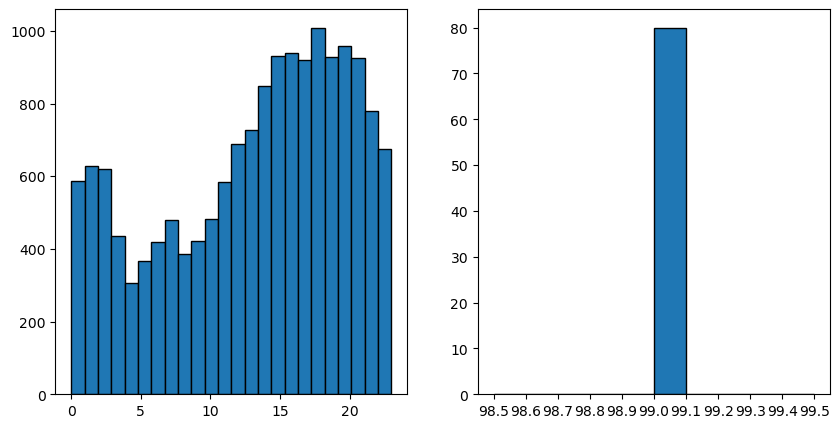

In [149]:
# create graph to display time of day crash occurred
df_hour = df['HOUR']
df_hour = df_hour.loc[df_hour[:] <= 24] # dropout unknown crash times to get cleaner histogram
# df_hour['HOUR'].plot.hist(bins=24)
# df_unknown_hour = df.loc[df['HOUR'] > 24]
# df_unknown_hour['HOUR'].plot.hist(bins=24)
df_unknown_hour = df['HOUR']
df_unknown_hour = df_unknown_hour.loc[df_unknown_hour[:] > 24]

fig,ax = plt.subplots(1,2, figsize=(10,5))
ax[0].hist(df_hour, 24,edgecolor = "black")
_,bins,_ = ax[1].hist(df_unknown_hour, edgecolor="black")
ax[1].set_xticks(bins);

Note:
0 -- made it to hospital 6978.0 
7 -- dead on arrival 9001.0 
8 -- died in trasit 121.0 
9 -- Unknown 25.0


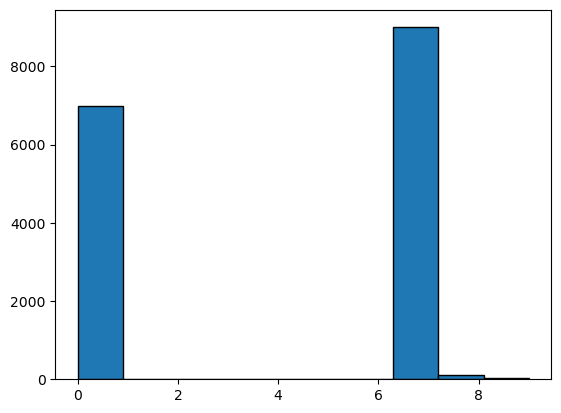

In [126]:
# graph of DOA
arr = plt.hist(df['DOA'], 10,edgecolor="black")
arr = arr[0]
print('Note:\n0 -- made it to hospital', arr[0], '\n7 -- dead on arrival', arr[7], '\n8 -- died in trasit', arr[8], '\n9 -- Unknown', arr[9])